<a href="https://colab.research.google.com/github/yoniamit/batlocations/blob/main/analyzeLocations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#imports
import math

#Definations
xlb = 320.0  # x left basket
ylb = 410.0  # y left basket
xrb = 420.0  # x right basket
yrb = 60.0  # y right basket
basketradius = 40.0  # distance from the center of the basket which count as "IN"
accuracy_limit = 0.0  # Value for accuracy check #הוספתי
data_read_path = "/content/drive/MyDrive/20210104-170423IrTimes.txt" #path_of data to read
data_write_path = "Filtered_Relevant_Data_Run_N.txt" #path of data to write
last_date = "0000"
day_number = 0

#functions
def in_or_out_basket_check(x,y,xb,yb):
    """
    Checks if distance of point x,y from the center of the basket is smaller then r.
    :param x: X point
    :param y: y point
    :param xb: X basket
    :paran yb: y basket
    :return: bool. True if equal or smaller then r. False if greater then r.
    """
    global basketradius

    if (math.sqrt((x - xb)**2 + (y - yb)**2) <= basketradius):
        return True
    else:
        return False

def day_generator(data_date): #לא עובד
    """ Which day number in the session """
    global last_date
    global day_number
    if (int(data_date) > int(last_date)):
        last_date = data_date
        day_number = day_number+1
    return str("day"+str(day_number))

#Program

data_write = open(data_write_path, "w")  # פתיחת קובץ חדש לרשימת הדאטה
f = open(data_read_path, "r")
data = Lines = f.readlines()

for line in data:
    columns = line.split(",")

    print(columns[13] + " " + columns[14])

    xydata = columns[14].split(" ")
    xydata = [x for x in xydata if x]
    xy_accuracy_data = columns[15].split(" ")  # הוספתי
    xy_accuracy_data = [x for x in xy_accuracy_data if x]  # הוספתי
    if (len(xydata) != 2) or (len(xy_accuracy_data) != 2):  # הוספתי
        continue

    x_accuracy_data = (float(xy_accuracy_data[0].replace("[", "").replace("]", "")))  # הוספתי
    y_accuracy_data = (float(xy_accuracy_data[1].replace("[", "").replace("]", "")))  # הוספתי
    if (y_accuracy_data > accuracy_limit) or (x_accuracy_data > accuracy_limit):  # הוספתי
        continue

    x = (float(xydata[0].replace("[", "").replace("]", "")))
    y = (float(xydata[1].replace("[", "").replace("]", "")))

    day_insert = day_generator(columns[0][4:])
    if in_or_out_basket_check(x,y,xlb,ylb):
      data_write.write(columns[0] + "," + columns[1] + "," + "Left" + "," + columns[13] + "," + columns[14] + "," + day_insert + "," + columns[15])
    elif in_or_out_basket_check(x,y,xrb,yrb):
      data_write.write(columns[0] + "," + columns[1] + "," + "Right" + "," + columns[13] + "," + columns[14] + "," + day_insert + "," + columns[15])

f.close()
data_write.close()
print("Done! Part1!")

Streaming output truncated to the last 5000 lines.
3 [227. 376.]
4 -1
3 [227. 376.]
2 -1
4 -1
3 [228. 375.]
2 [217. 373.]
4 -1
3 [228. 376.]
2 [216. 367.]
4 -1
3 [226. 376.]
2 [219. 372.]
3 [227. 376.]
2 [216. 371.]
4 -1
3 [229. 376.]
4 -1
3 [226. 376.]
2 [217. 373.]
4 -1
3 [233.  379.5]
2 [220. 370.]
4 -1
3 [227. 377.]
2 [227. 360.]
4 -1
3 [227. 376.]
2 -1
4 -1
3 [227. 376.]
2 [228. 356.]
4 -1
3 [227. 376.]
2 [224. 363.]
4 -1
3 [227. 376.]
2 [237. 361.]
4 -1
3 [227. 377.]
2 -1
4 -1
3 [227. 376.]
2 [248. 355.]
4 -1
3 [226. 375.]
2 [239.  362.5]
4 -1
3 [228. 375.]
2 [247.66666667 367.33333333]
4 -1
3 [228. 377.]
2 [246. 358.]
4 -1
3 [226. 376.]
2 [245. 359.]
4 -1
3 [229. 376.]
2 [245. 359.]
4 -1
3 [226. 376.]
2 [245. 359.]
4 -1
3 [232.5 376. ]
2 [244. 359.]
3 [228. 376.]
2 [244. 360.]
4 -1
3 [227. 376.]
2 [243. 360.]
4 -1
3 [227. 376.]
2 [243. 360.]
4 -1
3 [228. 376.]
4 -1
3 [226. 376.]
2 [239.5 363.5]
4 -1
2 [239.5 363. ]
4 -1
3 [228. 376.]
2 [246. 359.]
4 -1
3 [227. 376.]
2 -1
4 -1
3 

In [ ]:
#Definations
data_read_path = r"Filtered_Relevant_Data_Run_N.txt" #path of data to write
day = "Day0"

Left_in_basket_data = {}
Right_in_basket_data = {}
group_left_in_basket_data = {}
group_right_in_basket_data = {} 


#Program
data_write = open(data_read_path, "r")
for line in data_write:

  columns = line.split(",")
  line_day = columns[5]
  line_day_number = int(columns[5][3:])
  line_hour = columns[1][:2]
  line_tag = columns[3] #הוספתי
  #import numpy as np
  #a = np.zeros((10,10))
  #myarray = np.array(mylist)
  
  if line_day_number > int(day[3:]):
    print(day, "Done!")
    day = line_day
    Left_in_basket_data[line_day] =  {"0": [0]*24, "1": [0]*24, "2": [0]*24, "3": [0]*24, "4": [0]*24, "5": [0]*24}
    Right_in_basket_data[line_day] = {"0": [0]*24, "1": [0]*24, "2": [0]*24, "3": [0]*24, "4": [0]*24, "5": [0]*24}
    group_left_in_basket_data[line_day] = [0]*24
    group_right_in_basket_data[line_day] = [0]*24 
  
  if columns[2] == "Left":
    Left_in_basket_data[line_day][line_tag][int(line_hour)] += 1 #שוב הוא עושה את ימין ושמאל זהיים!!!
  elif columns[2] == "Right":
    Right_in_basket_data[line_day][line_tag][int(line_hour)] += 1

for DAY in Left_in_basket_data:
  for TAG in Left_in_basket_data[DAY]:
    for HOUR, VISITS in enumerate(Left_in_basket_data[DAY][TAG]):
      group_left_in_basket_data[DAY][HOUR] += VISITS  

for DAY in Right_in_basket_data:
  for TAG in Right_in_basket_data[DAY]:
    for HOUR, VISITS in enumerate(Right_in_basket_data[DAY][TAG]):
      group_right_in_basket_data[DAY][HOUR] += VISITS

print(day, "Done!")
print("final")
print("Left Group :\n", group_left_in_basket_data)
print("Right Group :\n", group_right_in_basket_data)
data_write.close()
print("Done! Part 2!")

Day0 Done!
day1 Done!
day2 Done!
day3 Done!
day4 Done!
final
Left Group :
 {'day1': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 9, 157, 1, 0], 'day2': [0, 0, 0, 0, 1, 0, 0, 0, 0, 5, 6, 1, 12, 82, 0, 17, 95, 4, 0, 0, 0, 2, 0, 0], 'day3': [0, 0, 1, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 3, 0, 0, 10, 0, 0, 0, 0, 0, 20, 9], 'day4': [0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}
Right Group :
 {'day1': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'day2': [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0], 'day3': [0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0], 'day4': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}
Done! Part 2!


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

#Definations
data_to_write_path_2 = r"Processed_Final_Data_Run_N.txt"
total_per_tag_left = {"0": [0]*24, "1": [0]*24, "2": [0]*24, "3": [0]*24, "4": [0]*24, "5": [0]*24}
total_per_tag_right = {"0": [0]*24, "1": [0]*24, "2": [0]*24, "3": [0]*24, "4": [0]*24, "5": [0]*24}
total_group_left = [0]*24
total_group_right = [0]*24

#Program
with open(data_to_write_path_2, "w") as data_write:
  data_write.write("Group: \n")
  for DAY in group_left_in_basket_data:
    total_group_left = [(x + y) for x, y in zip(total_group_left, group_left_in_basket_data[DAY])]
    total_group_right = [(x + y) for x, y in zip(total_group_right, group_right_in_basket_data[DAY])]
    data_write.write(DAY+ ": \n" + "Left: " + str(group_left_in_basket_data[DAY]) + "\n" + "Right: " + str(group_right_in_basket_data[DAY]) +"\n" )
  data_write.write("Total Group: \n")
  data_write.write("Left: " + str(total_group_left)+ "\n")
  data_write.write("Right: " + str(total_group_right)+ "\n")
  data_write.write("\n")

  for TAG in range(0, 6):
    data_write.write(f"Tag number: {int(TAG)} \n")
    for DAY in Left_in_basket_data:
      total_per_tag_left[str(TAG)] = [(x + y) for x, y in zip(total_per_tag_left[str(TAG)], Left_in_basket_data[DAY][str(TAG)])]
      total_per_tag_right[str(TAG)] = [(x + y) for x, y in zip(total_per_tag_right[str(TAG)], Right_in_basket_data[DAY][str(TAG)])]
      data_write.write(DAY+ ": \n" + "Left: " + str(Left_in_basket_data[DAY][str(TAG)]) + "\n" + "Right: " + str(Right_in_basket_data[DAY][str(TAG)]) +"\n" )
    data_write.write("Total: \n")
    data_write.write("Left: " + str(total_per_tag_left[str(TAG)])+ "\n")
    data_write.write("Right: " + str(total_per_tag_right[str(TAG)])+ "\n")
    data_write.write("\n")

print("Done! Part3!")


Done! Part3!


In [5]:
#Step1

#imports
import math
from datetime import datetime
import numpy as np

#Definations
xlb = 320.0  # x left basket
ylb = 410.0  # y left basket
xrb = 420.0  # x right basket
yrb = 60.0  # y right basket
basketradius = 40.0  # distance from the center of the basket which count as "IN"
accuracy_limit = 0.0  # Value for accuracy check #הוספתי
data_read_path = "/content/drive/MyDrive/Python files/20210207-154302IrTimes.txt" #path_of data to read
data_write_path = "Filtered_Relevant_Data_Run_N.txt" #path of data to write
last_date = "0000"
day_number = 0
list_locations = []



data_write = open(data_write_path, "w")  # פתיחת קובץ חדש לרשימת הדאטה
f = open(data_read_path, "r")
data = Lines = f.readlines()

for line in data:
    columns = line.split(",")
    #print(columns[13] + " " + columns[14])

    xydata = columns[14].split(" ")
    xydata = [x for x in xydata if x]
    xy_accuracy_data = columns[15].split(" ")  # הוספתי
    xy_accuracy_data = [x for x in xy_accuracy_data if x]  # הוספתי
    if (len(xydata) != 2) or (len(xy_accuracy_data) != 2):  # הוספתי
        continue

    x_accuracy_data = (float(xy_accuracy_data[0].replace("[", "").replace("]", "")))  # הוספתי
    y_accuracy_data = (float(xy_accuracy_data[1].replace("[", "").replace("]", "")))  # הוספתי
    if (y_accuracy_data > accuracy_limit) or (x_accuracy_data > accuracy_limit):  # הוספתי
        continue

    x = (float(xydata[0].replace("[", "").replace("]", "")))
    y = (float(xydata[1].replace("[", "").replace("]", "")))
    dt = datetime.strptime(columns[0] + " " + columns[1] ,  "%Y%m%d %H%M%S").timestamp()  #20210104
    t = np.array([int(columns[13]), dt, x, y])
    list_locations += [t]

list_array = np.array(list_locations)

f.close()
data_write.close()
print("Done! Part1!")





Done! Part1!


In [111]:
#Defenitions
per_unit = 3600
minimum_time = np.min(list_array[:,1])
maximum_time = np.max(list_array[:,1])
time_now = minimum_time
list_tag = np.unique(list_array[:,0])
main_data = np.zeros((len(list_tag),int((maximum_time-minimum_time)/per_unit), 2))
t = 0

print(list_array[:,1])
print(minimum_time, maximum_time)
print(type(list_tag[0]))

tagids  = list_array[:,0]
dates = list_array[:,1]



while time_now <= (maximum_time - per_unit):
  for a in range(len(list_tag)):
    main_data[a,t,:] = np.mean(list_array[(tagids == list_tag[a]) & (dates> time_now) & (dates< (time_now + per_unit)) ,2:4],axis = 0)
  t += 1  
  time_now += per_unit



print("Done! Part2!")

[1.61271258e+09 1.61271259e+09 1.61271260e+09 ... 1.61301981e+09
 1.61301981e+09 1.61301981e+09]
1612712585.0 1613019814.0
<class 'numpy.float64'>


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


Done! Part2!


In [7]:
def nan_helper(y):
    return np.isnan(y), lambda z: z.nonzero()[0]



In [112]:
for a in range(len(list_tag)):
    y = main_data[a,:,:]
    nans, x= nan_helper(y)
    y[nans]= np.interp(x(nans), x(~nans), y[~nans])
    main_data[a,:,:] = y
print("Done! Part3!")

Done! Part3!


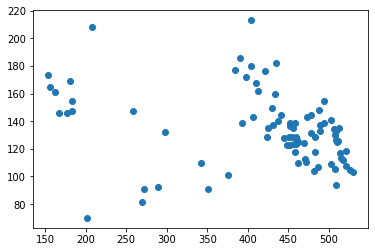

In [113]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(main_data[5,:, 0], main_data[5,:, 1])
plt.show()

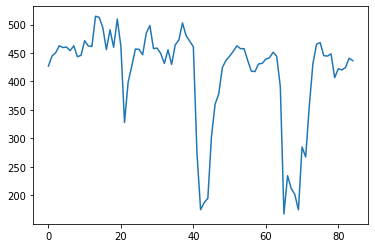

In [114]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(main_data[4,:,0])
plt.show()

In [115]:


time_now = minimum_time
t = 0
distance_array = np.zeros((len(list_tag),int((maximum_time-minimum_time)/per_unit)))

while time_now <= (maximum_time - per_unit):
  for a in range(len(list_tag)):
    my_pos = main_data[a,t,:]
    all_pos = main_data[:,t,:]
    other_bats_pos = np.delete(all_pos,a, 0)
    dist = []
    for pos in other_bats_pos:
      dist += [np.mean(np.linalg.norm(my_pos - pos))]
    dist = np.array(dist)
    dist = np.mean(dist)
    distance_array[a,t] = dist
  t += 1  
  time_now += per_unit

print(distance_array)

[[ 87.45121113 109.30746287 230.27295557 219.38926868 207.22315329
  128.64398718 122.97940086 196.22650536 247.49594666 213.74391189
  193.91546896 177.43078851 176.97756855 177.9646154  206.94318209
  148.96597818  84.76226173 261.94701973  84.0391722   74.28296701
   91.00553153 150.73281025 128.99913674 326.16322663 310.68512488
  193.51528899 185.74508341 153.03381589 150.4821948  171.25404232
  168.10570536 241.25714523 205.18850471 141.9575546  158.58904571
  137.10196034 168.04127746 140.9881787  268.19142177 244.9655628
  165.83253984 258.03662789  59.87432962  49.75303269  51.67470496
  110.20985461 211.63332655 244.292725   193.31586213 184.99035754
  128.85176616 149.37158241 161.37897927 165.53685432 169.56502475
  185.30199585 242.29443243 203.90264136 161.56988062 136.08912249
  172.6086321  222.16886929 173.75503778 132.53251853 159.15464302
  123.84703872  96.00424481  45.81153725  46.00262029  26.03052707
   69.89345602  66.77629893 110.65603175 194.79607701 188.41783

In [116]:
time_now = minimum_time + per_unit
t = 1
movment_array = np.zeros((len(list_tag),int((maximum_time-minimum_time)/per_unit)))

while time_now <= (maximum_time - per_unit):
  for a in range(len(list_tag)):
    my_pos = main_data[a,t,:]
    mt_prev_pos = main_data[a,t -1,:]
    thedistance = np.linalg.norm(my_pos - mt_prev_pos)
    movment_array[a,t-1] = (thedistance )
  t += 1  
  time_now += per_unit

print(movment_array)
correlations = []
for a in range(len(list_tag)):
  correlations.append(np.correlate(movment_array[a,:],distance_array[a,:]))


correlations = np.array(correlations)
print(correlations)

[[3.23058900e+00 1.46306184e+02 1.64726804e+01 4.00143046e+01
  8.86427514e+01 8.61296626e+00 9.95876581e+01 7.80730746e+01
  5.95296979e+01 5.31562236e+01 3.63883508e+01 3.81908167e+01
  3.23749103e+01 3.70149082e+01 5.55300656e+01 8.82157625e+01
  1.99879165e+02 2.58272741e+02 2.27982245e+01 8.75302347e+00
  3.46908011e+01 7.04831663e+01 1.92013203e+02 6.70655559e+00
  2.33379489e+02 5.05423106e+01 1.57957404e+01 2.23134701e+01
  8.97520498e+00 6.05075305e+00 2.68118585e+02 3.16706029e+01
  2.08149639e+02 6.61874004e+01 5.92379241e+01 9.28214327e+01
  5.23038910e+01 2.68715162e+02 7.95611087e+01 2.00470241e+02
  4.16116161e+01 3.00811059e+02 3.54248939e+01 1.55859108e+01
  1.43632580e+02 1.04124115e+02 1.09295395e+02 1.44793240e+01
  3.10893282e+01 2.18235654e+01 2.74996225e+01 4.53909620e+01
  3.28583104e+01 7.55223241e+00 7.12533928e+00 6.28236408e+01
  4.21757597e+01 3.89712280e+01 2.86164888e+01 1.00131864e+02
  5.22789138e+01 7.92421098e+01 6.85010424e+01 3.24546726e+01
  1.7034

[[181.12437031 165.73383203]
 [444.91754733 139.2472808 ]
 [232.20155804 232.20155804]
 [453.02193664 218.89282041]
 [508.72424686 125.17942126]
 [456.96493324 339.07272536]
 [104.66666667 104.66666667]
 [309.34278892 157.48050341]]
[0.06856026 0.27800857 0.16469864 0.07391991 0.15287347 0.04595523
 0.1215685  0.09441541]


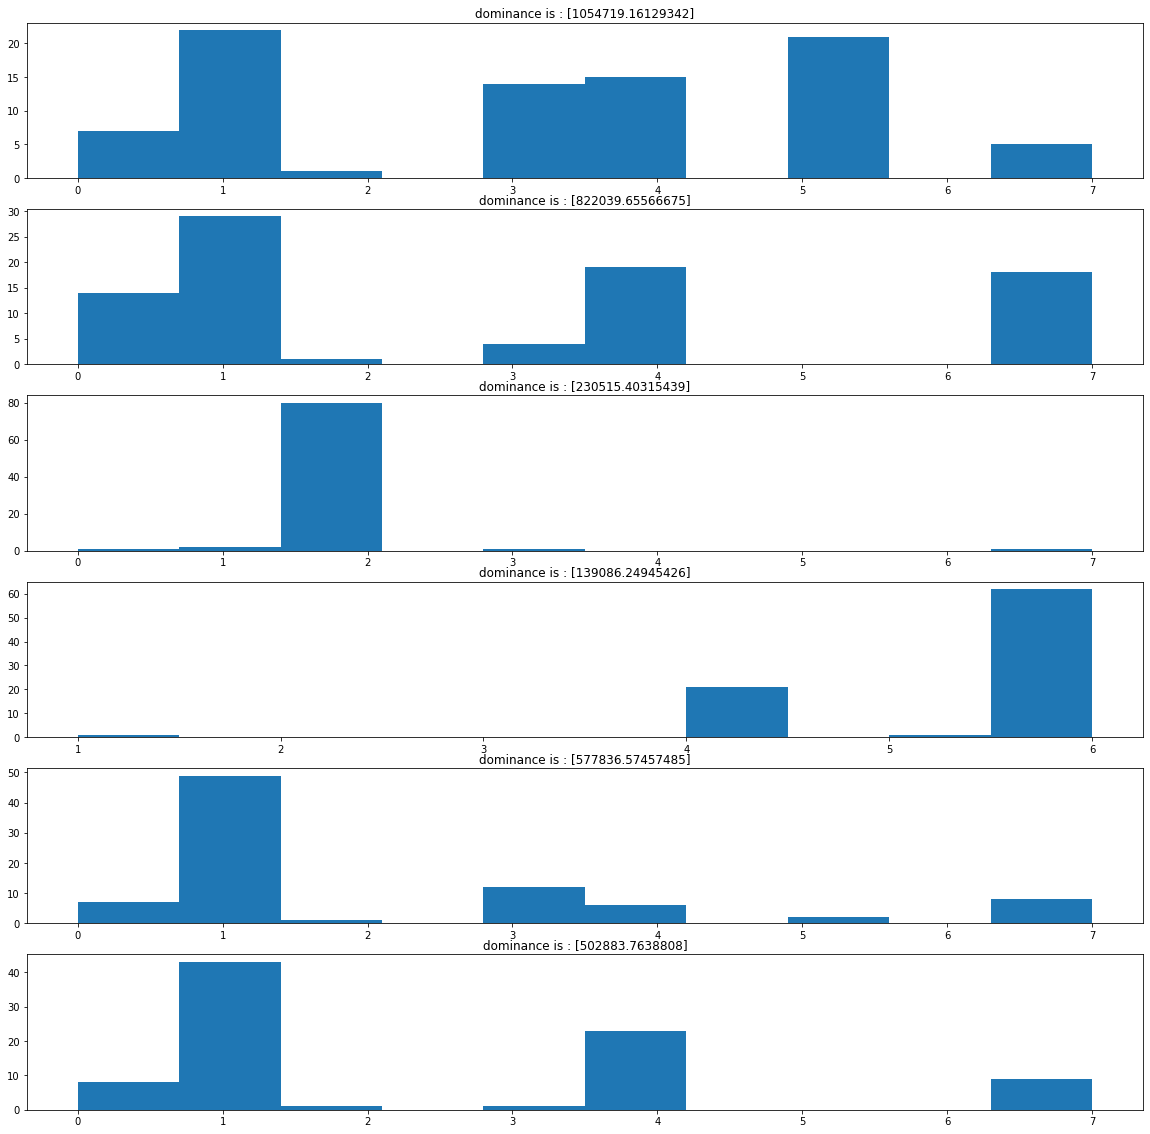

In [117]:
import numpy as np
from sklearn.mixture import GaussianMixture
maindatashape = np.shape(main_data)
f = np.reshape([main_data[:,:,:] ] , (maindatashape[0]*maindatashape[1] , 2) )
gmmcomp = 8
gm = GaussianMixture(n_components=gmmcomp, random_state=0).fit( f )
print(gm.means_)
print(gm.weights_)

fig , axs= plt.subplots(len(list_tag) ,figsize=(20,20))
for a in range(len(list_tag)):
    gmpred = gm.predict(main_data[a,:,:])
    
    axs[a].set_title("dominance is : " + str(correlations[a]))
    axs[a].hist(gmpred)
fig.savefig('result1.png')


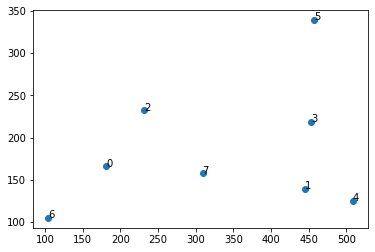

In [118]:
import matplotlib.pyplot as plt

fig= plt.figure()

f = np.array(range(gmmcomp))
for i, txt in enumerate(f):
    plt.annotate(txt, (gm.means_[i,0], gm.means_[i,1]))
    
plt.scatter(gm.means_[:, 0], gm.means_[:, 1])
plt.show()
fig.savefig('mapofplaces.png')

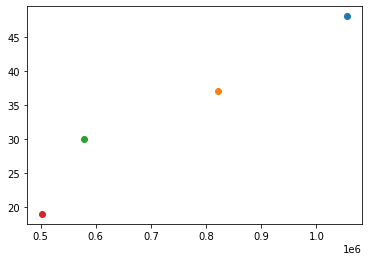

In [122]:

fig = plt.figure()
for a in range(len(list_tag)):
    if( a == 2 or a == 3):
     continue
    gmpred = ((gm.predict(main_data[a,:,:]) == 1) | (gm.predict(main_data[a,:,:]) == 4)).astype(int)
    plt.scatter(correlations[a] , len(gmpred[gmpred==0]))
    
fig.savefig('dominanceVsHome.png')